1. Загрузить выборку с сайта diabetes.csv.
2. Провести анализ полученной выборки используя метрики описательной статистики.
4. Проверить баланс выборки (вывести график).
5. Проовести андерсэмплинг.
6. Провести оверсемплинг.
7. Сравнить полученные результаты.

In [31]:
import pandas as pd
import numpy as np

In [75]:
df=pd.read_csv('/content/gender_classification_v7.csv')
df.head(5)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [76]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [77]:
# отбор нечисловых колонок (Категориальные признаки)

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)
df_non_numeric

['gender']


,gender
0,Male
1,Female
2,Male
3,Male
4,Female
...,...
4996,Female
4997,Female
4998,Female
4999,Female


In [78]:
# отбор числовых колонок (Числовые признаки)

df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)
df_numeric

['long_hair' 'forehead_width_cm' 'forehead_height_cm' 'nose_wide'
 'nose_long' 'lips_thin' 'distance_nose_to_lip_long']


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [80]:
X=df.iloc[:,0:4]
y=df['gender']
X,y

(      long_hair  forehead_width_cm  forehead_height_cm  nose_wide
 0             1               11.8                 6.1          1
 1             0               14.0                 5.4          0
 2             0               11.8                 6.3          1
 3             0               14.4                 6.1          0
 4             1               13.5                 5.9          0
 ...         ...                ...                 ...        ...
 4996          1               13.6                 5.1          0
 4997          1               11.9                 5.4          0
 4998          1               12.9                 5.7          0
 4999          1               13.2                 6.2          0
 5000          1               15.4                 5.4          1
 
 [5001 rows x 4 columns],
 0         Male
 1       Female
 2         Male
 3         Male
 4       Female
          ...  
 4996    Female
 4997    Female
 4998    Female
 4999    Female
 5000   

In [81]:
# простой случайный сэмплинг
sample_df = df.sample(66)
sample_df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4432,1,13.5,5.3,1,1,1,1,Male
276,1,14.1,5.9,0,1,0,1,Female
4156,1,14.1,6.2,0,0,0,0,Female
4293,1,13.4,5.7,1,0,0,0,Female
3941,1,14.5,7.0,1,1,1,1,Male
...,...,...,...,...,...,...,...,...
3258,0,13.8,5.6,0,0,1,0,Female
4258,1,14.4,5.9,1,1,1,1,Male
4384,1,15.3,6.1,1,1,1,1,Male
566,1,12.9,5.2,1,1,0,1,Male


In [95]:
X=df.iloc[:,:5]
y=df.iloc[:,6]
X,y

(      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long
 0             1               11.8                 6.1          1          0
 1             0               14.0                 5.4          0          0
 2             0               11.8                 6.3          1          1
 3             0               14.4                 6.1          0          1
 4             1               13.5                 5.9          0          0
 ...         ...                ...                 ...        ...        ...
 4996          1               13.6                 5.1          0          0
 4997          1               11.9                 5.4          0          0
 4998          1               12.9                 5.7          0          0
 4999          1               13.2                 6.2          0          0
 5000          1               15.4                 5.4          1          1
 
 [5001 rows x 5 columns],
 0       1
 1       0
 2       1
 3 

Class 0: 2506
Class 1: 2495
Пропорция: 1.0 : 1


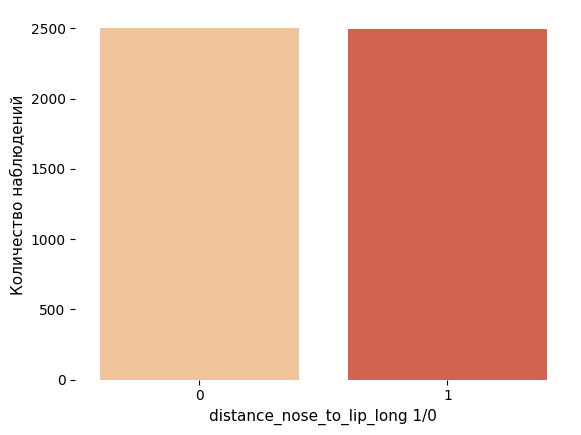

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Проверка баланса выходной переменной
target_count = df.distance_nose_to_lip_long.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Пропорция:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(x='distance_nose_to_lip_long', data= df, palette="OrRd")
plt.box(False)
plt.xlabel('distance_nose_to_lip_long 1/0',fontsize=11)
plt.ylabel('Количество наблюдений',fontsize=11)
plt.show()

1    2495
0    2495
Name: distance_nose_to_lip_long, dtype: int64


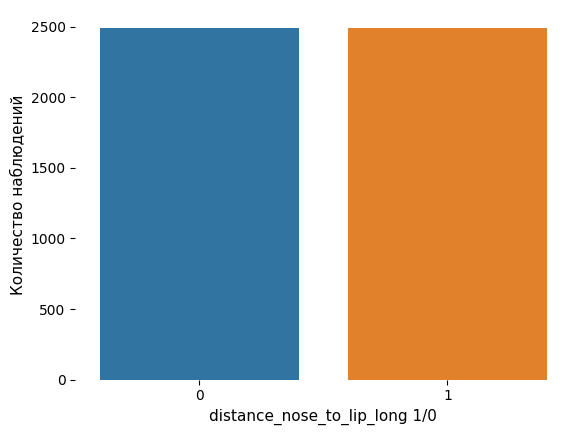

In [121]:
# перемешаем датафрейм
shuffled_df = df.sample(frac=1, random_state=4)

# Поместите весь класс 1 в отдельный набор данных.
CHD_df = shuffled_df.loc[shuffled_df['distance_nose_to_lip_long'] == 1]

#Произвольно выберем 492 наблюдения из класса 0 (класс большинства)
none_CHD_df = shuffled_df.loc[shuffled_df['distance_nose_to_lip_long'] == 0].sample(n=2495, random_state=42)

# Снова объедините оба фрейма данных
normalize_df = pd.concat([CHD_df, none_CHD_df])

# проверить количество новых классов
target_count2 = normalize_df.distance_nose_to_lip_long.value_counts()
print(target_count2)
sns.countplot(data=normalize_df, x='distance_nose_to_lip_long')
plt.box(False)
plt.xlabel('distance_nose_to_lip_long 1/0', fontsize=11)
plt.ylabel('Количество наблюдений', fontsize=11)
plt.show()

In [122]:
# андерсэмплинг
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_res, y_res = tl.fit_resample(X, y)
print(X_res.shape)
print(X.shape)
df_new=pd.concat([X_res, y_res], axis=1)
df_new.shape


(4927, 5)
(5001, 5)


(4927, 6)

(5012, 5)
(5001, 5)


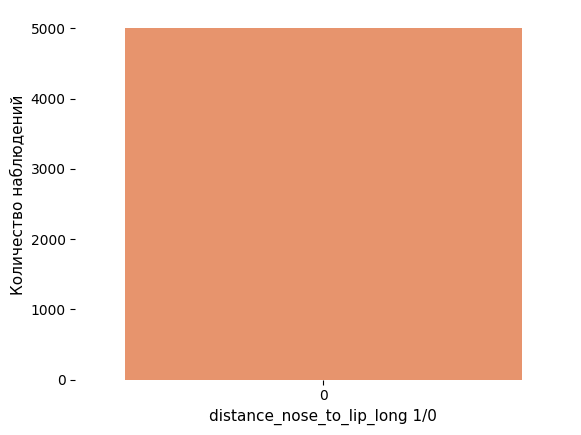

In [142]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
print(X_sm.shape)
print(X.shape)
df_new_sm=pd.concat([X_sm, y_sm], axis=1)
df_new_sm.shape

sns.countplot(df_new_sm.distance_nose_to_lip_long, palette="OrRd")
plt.box(False)
plt.xlabel('distance_nose_to_lip_long 1/0',fontsize=11)
plt.ylabel('Количество наблюдений',fontsize=11)
plt.show()

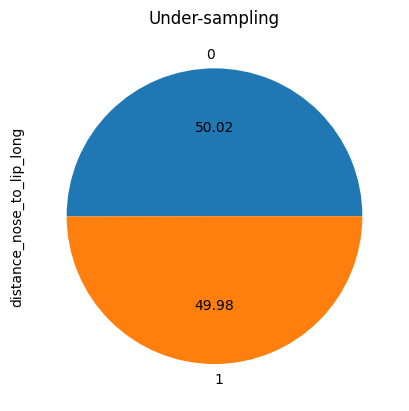

In [137]:
from imblearn.under_sampling import RandomUnderSampler

sampling_strategy = 0.999
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X, y)
autopct = "%.2f"
ax = y_res.value_counts().plot.pie(autopct=autopct)
_ = ax.set_title("Under-sampling")

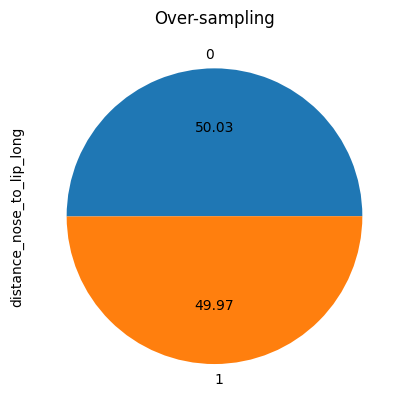

In [138]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_s, y_s = ros.fit_resample(X, y)
ax = y_s.value_counts().plot.pie(autopct=autopct)
_ = ax.set_title("Over-sampling")

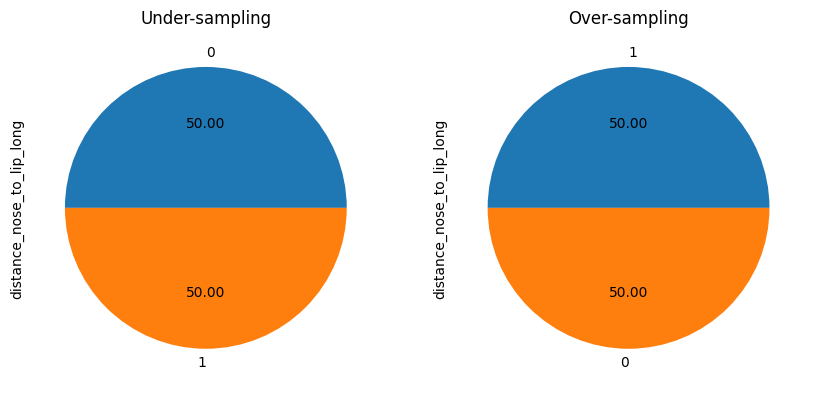

In [139]:
# сравнение
sampling_strategy = "not minority"

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X, y)
y_res.value_counts().plot.pie(autopct=autopct, ax=axs[0])
axs[0].set_title("Under-sampling")

sampling_strategy = "not majority"
ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_s, y_s = ros.fit_resample(X, y)
y_s.value_counts().plot.pie(autopct=autopct, ax=axs[1])
_ = axs[1].set_title("Over-sampling")